[241 170 178]


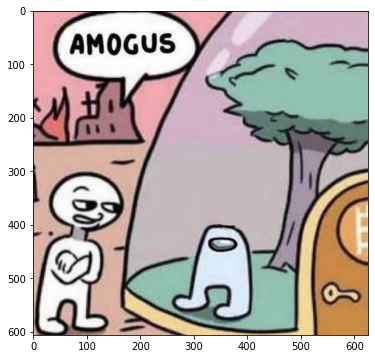

In [34]:
import cv2 as cv
from matplotlib import pyplot as plt
import numpy as np

plt.rcParams["figure.figsize"] = (6, 6)

image = cv.imread("images/amogus.png")
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.imshow(image)
print(image[0,0])

# Zadanie 1

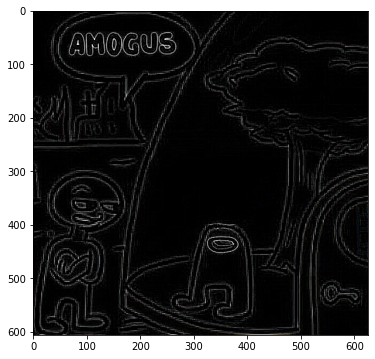

In [35]:
kernel_edgedetect = [
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1]
]
kernel_edgedetect = np.asarray(kernel_edgedetect)
image_edges = cv.filter2D(image, -1, kernel=kernel_edgedetect)
plt.imshow(image_edges)

# Zadanie 2

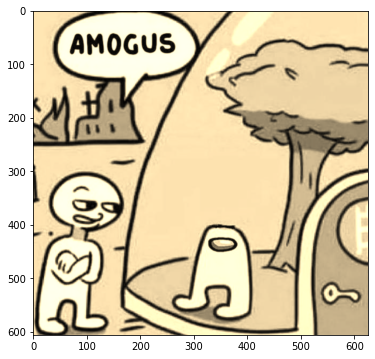

In [36]:
image_asfloat = image.astype(float)
image_asfloat = image_asfloat / 255.0

colorshift_matrix = [
    [0.393, 0.769, 0.189],
    [0.349, 0.689, 0.168],
    [0.272, 0.534, 0.131]
]

colorshift_matrix = np.asarray(colorshift_matrix)

image_colorshifted = np.asarray([colorshift_matrix.dot(pixel) for pixel in np.vstack(image_asfloat)]) \
    .clip(min=0.0, max=1.0).reshape(image_asfloat.shape)
plt.imshow(image_colorshifted)

# Zadanie 3

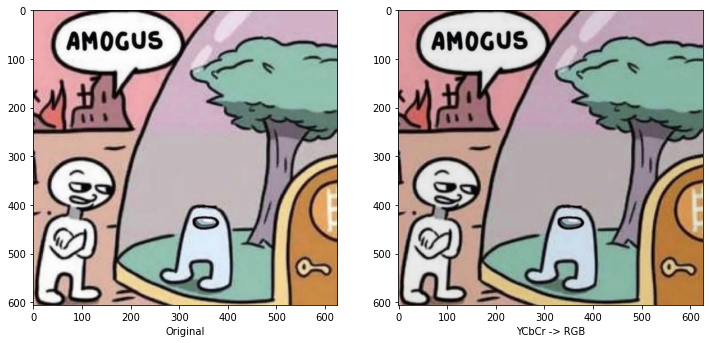

In [37]:
to_cbcr_matrix = np.asarray([
    [ 0.229,  0.587,  0.114],
    [ 0.500, -0.418, -0.082],
    [-0.168, -0.331,  0.500],
])

image_crcb = np.asarray([np.array([0, 128, 128]) + to_cbcr_matrix.dot(pixel) for pixel in np.vstack(image)]) \
    .clip(min=0, max=255).reshape(image.shape).astype(np.uint8)

image_crcb_to_rgb = cv.cvtColor(image_crcb, cv.COLOR_YCrCb2RGB)

fig, ax = plt.subplots(1,2, figsize=(12, 6))

ax[0].set_xlabel('Original')
ax[0].imshow(image)
ax[1].set_xlabel('YCbCr -> RGB')
ax[1].imshow(image_crcb_to_rgb)

# Zadanie 4

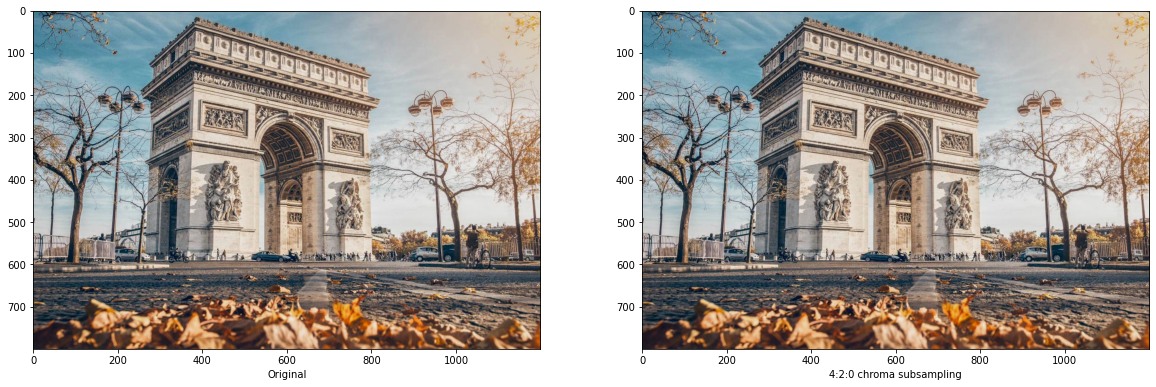

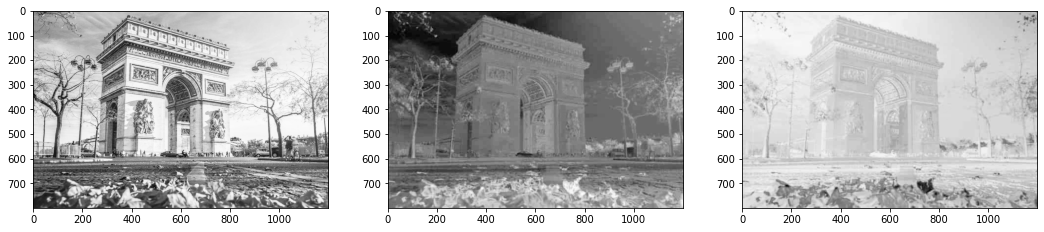

In [38]:
image2 = cv.cvtColor(cv.imread("images/example.png"), cv.COLOR_BGR2RGB)

image2_crcb = np.asarray( \
    [np.array([0, 128, 128]) + to_cbcr_matrix.dot(pixel) for pixel in np.vstack(image2)]) \
    .clip(min=0, max=255).reshape(image2.shape).astype(np.uint8)

image_cr = np.array(image2_crcb[:,:,1])
image_cb = np.array(image2_crcb[:,:,2])

mask_vertical = np.arange(1, image2_crcb.shape[0], 2)
mask_horizontal = np.arange(1, image2_crcb.shape[1], 2)

# Cr
image_cr_downsampled = np.array(image_cr)

image_cr_downsampled = np.delete(image_cr_downsampled, mask_vertical, axis=0)
image_cr_downsampled = np.delete(image_cr_downsampled, mask_horizontal, axis=1)

image_cr_downsampled = np.repeat(image_cr_downsampled, 2, axis=0)
image_cr_downsampled = np.repeat(image_cr_downsampled, 2, axis=1)

# Cb
image_cb_downsampled = np.array(image_cb)

image_cb_downsampled = np.delete(image_cb_downsampled, mask_vertical, axis=0)
image_cb_downsampled = np.delete(image_cb_downsampled, mask_horizontal, axis=1)

image_cb_downsampled = np.repeat(image_cb_downsampled, 2, axis=0)
image_cb_downsampled = np.repeat(image_cb_downsampled, 2, axis=1)

image_downsampled = np.array(image2_crcb)
image_downsampled[:,:,1] = image_cr_downsampled
image_downsampled[:,:,2] = image_cb_downsampled

fig, ax = plt.subplots(1, 2, figsize=(20, 10))

ax[0].set_xlabel('Original')
ax[0].imshow(cv.cvtColor(image2_crcb, cv.COLOR_YCrCb2RGB))
ax[1].set_xlabel('4:2:0 chroma subsampling')

image_downsampled_rgb = cv.cvtColor(image_downsampled, cv.COLOR_YCrCb2RGB)
ax[1].imshow(image_downsampled_rgb)

fig2, ax2 = plt.subplots(1, 3, figsize=(18, 7))


ax2[0].imshow(image_downsampled[:, :, 0], cmap="Greys_r")
ax2[1].imshow(image_downsampled[:, :, 1], cmap="Greys_r")
ax2[2].imshow(image_downsampled[:, :, 2], cmap="Greys_r")

# Zadanie 5

In [39]:
m = 3
n = image.size
difference_sum = 0

input_image = image2
output_image = image_downsampled_rgb

mean_square_error = (1/n) * (1/m) * np.sum(np.square(input_image - output_image))

print(mean_square_error)

76.31849180658214
